# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp (in celsius), humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | opuwo
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | lichinga
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | lubao
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | vostochnyy
Processing Record 13 of Set 1 | angaur state
Processing Record 14 of Set 1 | chernyshevsk
Processing Record 15 of Set 1 | powell river
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | san rafael
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | zmeinogorsk
Processing Record 21 of Set 1 | newman
Processing Record 22

Processing Record 38 of Set 4 | riverton
Processing Record 39 of Set 4 | iskateley
Processing Record 40 of Set 4 | perene
Processing Record 41 of Set 4 | porto novo
Processing Record 42 of Set 4 | pyin oo lwin
Processing Record 43 of Set 4 | balaka
Processing Record 44 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | thunder bay
Processing Record 48 of Set 4 | swartz creek
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | tura
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | prince albert
Processing Record 3 of Set 5 | saudarkrokur
Processing Record 4 of Set 5 | tibu
Processing Record 5 of Set 5 | kingston
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | chidawa
Processing Record 8 of Set 5 | miles city
Processing Record 9 of Set 5 | mirnyy
Processing Record 10 of Set 5 | kudahuvadhoo
Processi

Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | kill devil hills
Processing Record 34 of Set 8 | maubara
City not found. Skipping...
Processing Record 35 of Set 8 | winnemucca
Processing Record 36 of Set 8 | kodiak
Processing Record 37 of Set 8 | proletariy
Processing Record 38 of Set 8 | bontang
Processing Record 39 of Set 8 | the pas
Processing Record 40 of Set 8 | menongue
Processing Record 41 of Set 8 | remire-montjoly
Processing Record 42 of Set 8 | phang nga
Processing Record 43 of Set 8 | glace bay
Processing Record 44 of Set 8 | yagry
City not found. Skipping...
Processing Record 45 of Set 8 | aripuana
Processing Record 46 of Set 8 | hailey
Processing Record 47 of Set 8 | banda aceh
Processing Record 48 of Set 8 | inverell
Processing Record 49 of Set 8 | diamond springs
Processing Record 0 of Set 9 | zouerate
Processing Record 1 of Set 9 | cascais
Processing Record 2 of Set 9 | jacksonville
Processing Record 3 of Set 9 | boende
Processing Record 4 of Set 9 

Processing Record 23 of Set 12 | darhan
Processing Record 24 of Set 12 | marquette
Processing Record 25 of Set 12 | oakham
Processing Record 26 of Set 12 | cidreira
Processing Record 27 of Set 12 | kupang
Processing Record 28 of Set 12 | saint-philippe
Processing Record 29 of Set 12 | kijang
Processing Record 30 of Set 12 | diu
Processing Record 31 of Set 12 | port glaud
City not found. Skipping...
Processing Record 32 of Set 12 | am timan
Processing Record 33 of Set 12 | caleta de carquin
Processing Record 34 of Set 12 | bom jesus
Processing Record 35 of Set 12 | simpang
Processing Record 36 of Set 12 | niwai
Processing Record 37 of Set 12 | tauranga
Processing Record 38 of Set 12 | gagarawa
Processing Record 39 of Set 12 | ad dabbah
Processing Record 40 of Set 12 | ridder
Processing Record 41 of Set 12 | urzhar
Processing Record 42 of Set 12 | kushiro
Processing Record 43 of Set 12 | krumovgrad
Processing Record 44 of Set 12 | timmins
Processing Record 45 of Set 12 | ola
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,opuwo,-18.0607,13.8400,20.02,12,0,1.60,NA,1698729636
1,margaret river,-33.9500,115.0667,18.97,52,44,4.81,AU,1698729636
2,badger,64.8000,-147.5333,-0.86,93,75,0.00,US,1698729637
3,lihue,21.9789,-159.3672,25.77,75,40,3.60,US,1698729637
4,lichinga,-13.3128,35.2406,20.05,83,100,4.12,MZ,1698729637


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,opuwo,-18.0607,13.8400,20.02,12,0,1.60,NaN,1698729636
1,margaret river,-33.9500,115.0667,18.97,52,44,4.81,AU,1698729636
2,badger,64.8000,-147.5333,-0.86,93,75,0.00,US,1698729637
3,lihue,21.9789,-159.3672,25.77,75,40,3.60,US,1698729637
4,lichinga,-13.3128,35.2406,20.05,83,100,4.12,MZ,1698729637


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

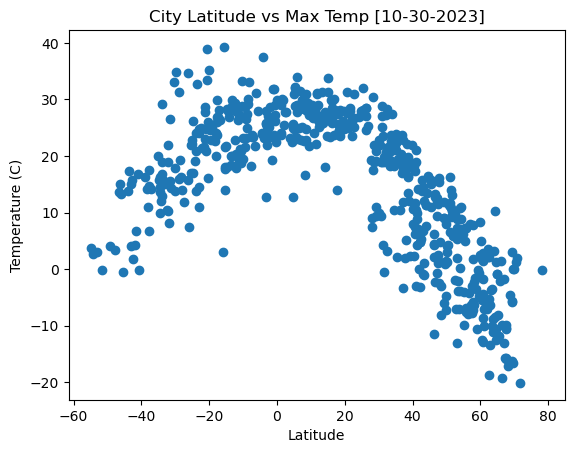

In [9]:
# Build scatter plot for latitude vs. temperature
lat_data = city_data_df["Lat"]
temp_data = city_data_df["Max Temp"]
plt.scatter(lat_data, temp_data)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp [10-30-2023]")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

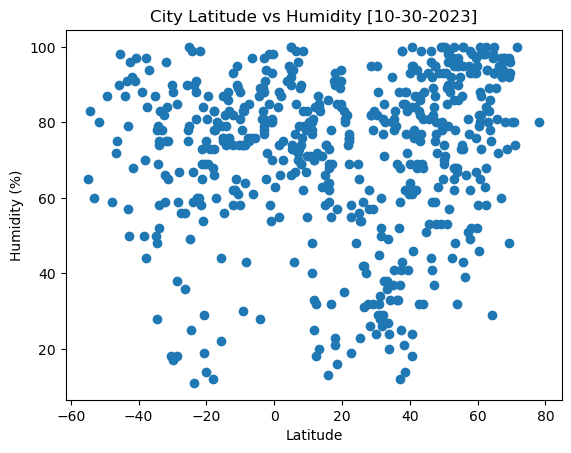

In [10]:
# Build the scatter plots for latitude vs. humidity
lat_data = city_data_df["Lat"]
humid_data = city_data_df["Humidity"]
plt.scatter(lat_data, humid_data)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity [10-30-2023]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

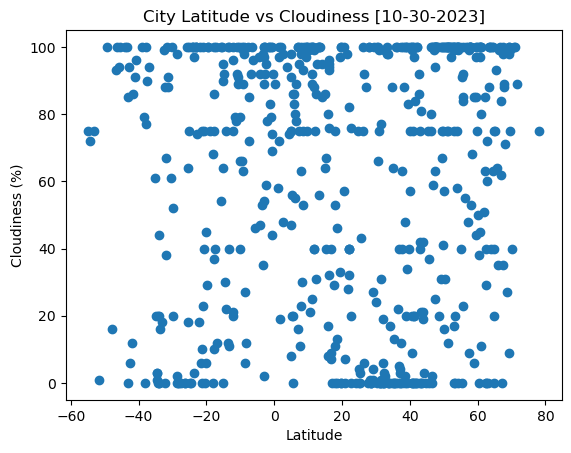

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat_data = city_data_df["Lat"]
cloud_data = city_data_df["Cloudiness"]
plt.scatter(lat_data, cloud_data)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness [10-30-2023]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

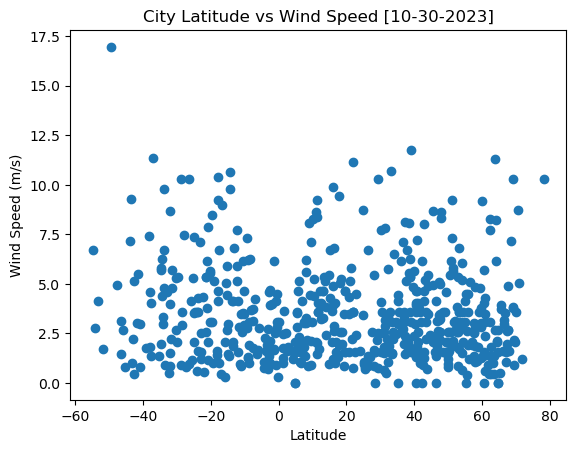

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat_data = city_data_df["Lat"]
wind_data = city_data_df["Wind Speed"]
plt.scatter(lat_data, wind_data)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed [10-30-2023]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regress_plots(x_data, y_data):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_data, y_data)
    y_regress = x_data*slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_regress,'r-')
    print(line_eq)
    print(f"The r-value is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,badger,64.8000,-147.5333,-0.86,93,75,0.00,US,1698729637
3,lihue,21.9789,-159.3672,25.77,75,40,3.60,US,1698729637
6,college,64.8569,-147.8028,-0.82,93,40,0.00,US,1698729638
9,lubao,14.9167,120.5500,33.84,58,86,5.44,PH,1698729638
11,vostochnyy,55.8167,37.8667,7.28,100,85,1.90,RU,1698729639


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,opuwo,-18.0607,13.8400,20.02,12,0,1.60,NaN,1698729636
1,margaret river,-33.9500,115.0667,18.97,52,44,4.81,AU,1698729636
4,lichinga,-13.3128,35.2406,20.05,83,100,4.12,MZ,1698729637
5,alice springs,-23.7000,133.8833,32.75,11,3,3.60,AU,1698729637
7,port elizabeth,-33.9180,25.5701,16.84,74,0,6.69,ZA,1698729638


###  Temperature vs. Latitude Linear Regression Plot

y = -0.6x + 35.01
The r-value is: 0.758901272341411


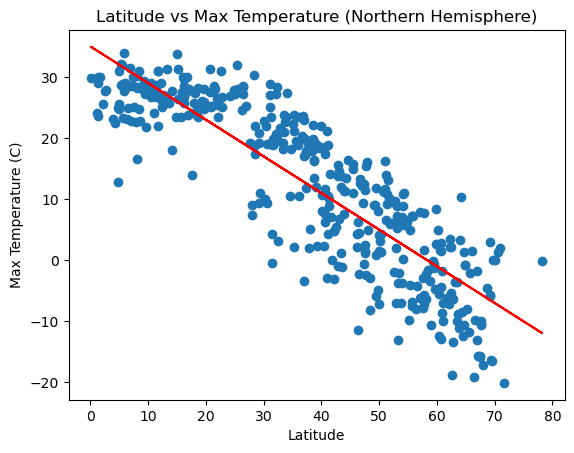

In [16]:
# Linear regression on Northern Hemisphere

lat_data = northern_hemi_df["Lat"]
temp_data = northern_hemi_df["Max Temp"]

regress_plots(lat_data,temp_data)

plt.title("Latitude vs Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.show()

y = 0.39x + 28.96
The r-value is: 0.43540939610313456


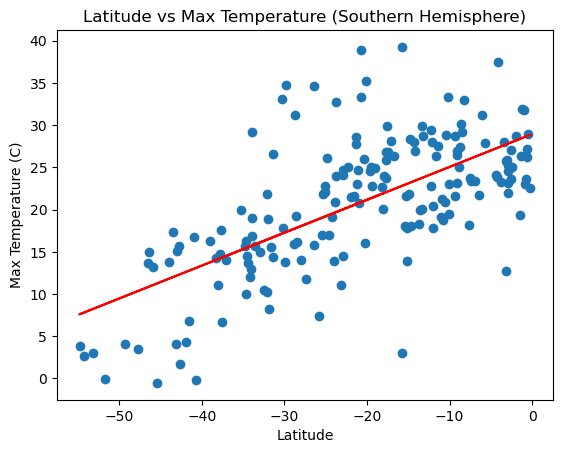

In [17]:
# Linear regression on Southern Hemisphere

lat_data = southern_hemi_df["Lat"]
temp_data = southern_hemi_df["Max Temp"]
 
regress_plots(lat_data,temp_data)

plt.title("Latitude vs Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.show()

**Discussion about the linear relationship: These plots show a very strong correlation between latitude and max temperature, where the further away from the equator a city is, the lower the maximum temperature. The Northern Hemisphere decreases at a much higher rate than the southern hemisphere. The r-value for the Southern Hemisphere is also much lower than for the Northern Hemisphere, indicating a less linear correlation.

### Humidity vs. Latitude Linear Regression Plot

y = 0.25x + 62.33
The r-value is: 0.050036870315363156


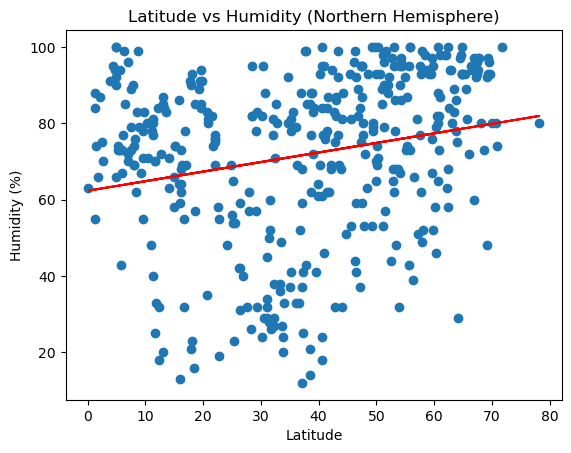

In [18]:
# Northern Hemisphere

lat_data = northern_hemi_df["Lat"]
humid_data = northern_hemi_df["Humidity"]
 
regress_plots(lat_data,humid_data)

plt.title("Latitude vs Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

y = 0.11x + 74.15
The r-value is: 0.006304120564012844


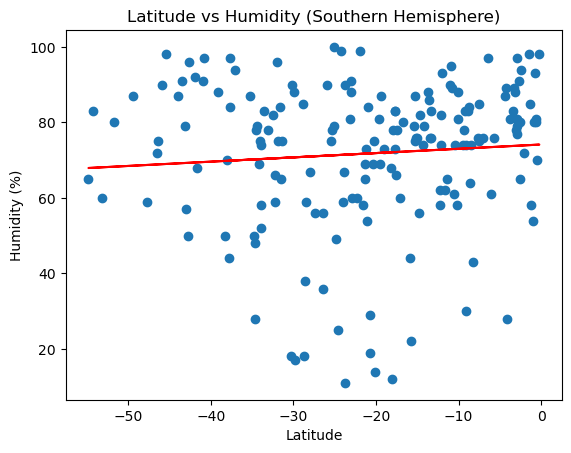

In [19]:
# Southern Hemisphere

lat_data = southern_hemi_df["Lat"]
humid_data = southern_hemi_df["Humidity"]
  
regress_plots(lat_data,humid_data)

plt.title("Latitude vs Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

**Discussion about the linear relationship:** Linear regression would not be very useful to analyze latitude vs humidity, with r-values less than 0.1 for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.16x + 53.12
The r-value is: 0.0064959379658332626


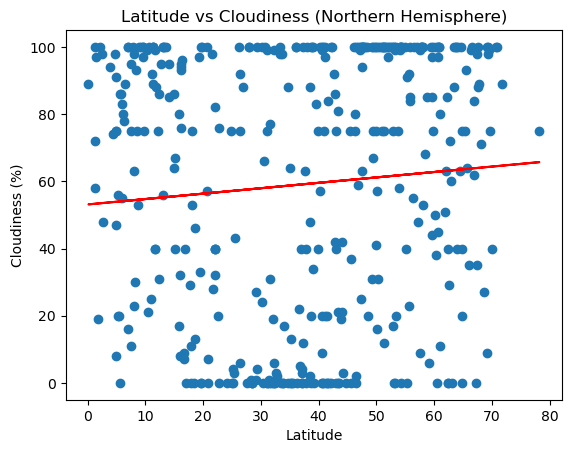

In [20]:
# Northern Hemisphere

lat_data = northern_hemi_df["Lat"]
cloud_data = northern_hemi_df["Cloudiness"]

regress_plots(lat_data,cloud_data)

plt.title("Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

y = 0.5x + 72.35
The r-value is: 0.033045229168534015


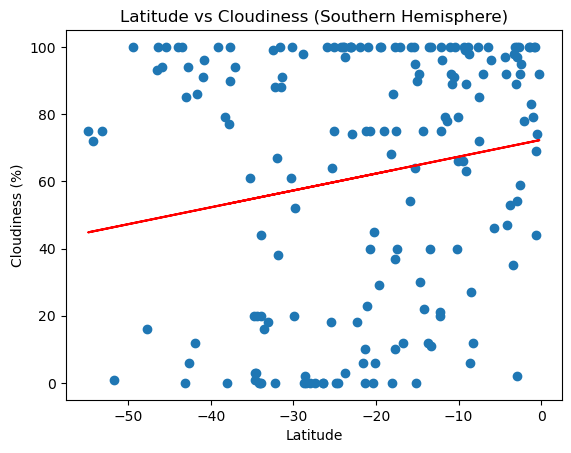

In [21]:
# Southern Hemisphere

lat_data = southern_hemi_df["Lat"]
cloud_data = southern_hemi_df["Cloudiness"]
 
regress_plots(lat_data,cloud_data)

plt.title("Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

**Discussion about the linear relationship:** With such small r-values, linear regression would not be a very effective tool to analyze latitude vs cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x + 3.26
The r-value is: 1.7939117560242617e-05


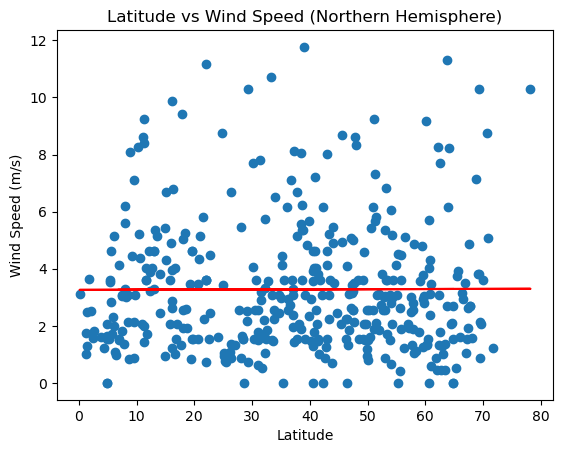

In [22]:
# Northern Hemisphere

lat_data = northern_hemi_df["Lat"]
wind_data = northern_hemi_df["Wind Speed"]

regress_plots(lat_data,wind_data)

plt.title("Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.show()

y = 0.39x + 28.96
The r-value is: 0.43540939610313456


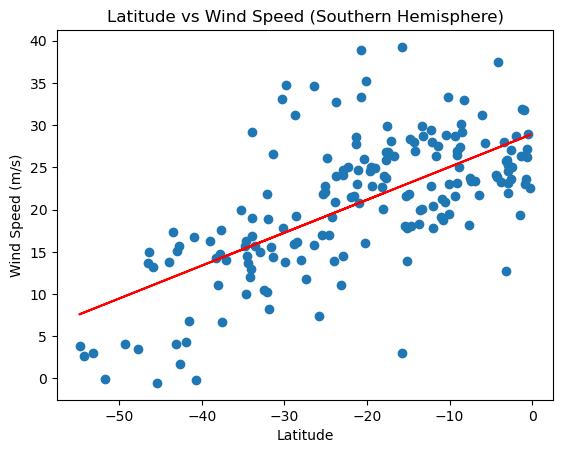

In [23]:
# Southern Hemisphere

lat_data = southern_hemi_df["Lat"]
wind_data = southern_hemi_df["Wind Speed"]
 
regress_plots(lat_data,temp_data)

plt.title("Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.show()

**Discussion about the linear relationship:** While for cities in the Northern Hemisphere a linear model would not be particularly useful, the southern hemisphere shows a stronger linear relationship, with an r-value of 0.435. Wind speeds increase as the cities get closer to the equator.